#Kaggle dataset download

In [1]:
from google.colab import files
files.upload() #uploading api

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"apoorvb","key":"ea102443c4fe13d54fd20e037c3e8b02"}'}

In [2]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!kaggle competitions download -c acea-water-prediction

dataset_description.ods: Skipping, found more recently modified local copy (use --force to force download)
Aquifer_Luco.csv: Skipping, found more recently modified local copy (use --force to force download)
Aquifer_Doganella.csv: Skipping, found more recently modified local copy (use --force to force download)
Water_Spring_Amiata.csv: Skipping, found more recently modified local copy (use --force to force download)
Aquifer_Petrignano.csv: Skipping, found more recently modified local copy (use --force to force download)
Aquifer_Auser.csv: Skipping, found more recently modified local copy (use --force to force download)
Lake_Bilancino.csv: Skipping, found more recently modified local copy (use --force to force download)
River_Arno.csv: Skipping, found more recently modified local copy (use --force to force download)
dataset_description.xlsx: Skipping, found more recently modified local copy (use --force to force download)
Water_Spring_Madonna_di_Canneto.csv: Skipping, found more recently

In [4]:
mv * /content/

mv: 'Aquifer_Auser.csv' and '/content/Aquifer_Auser.csv' are the same file
mv: 'Aquifer_Doganella.csv' and '/content/Aquifer_Doganella.csv' are the same file
mv: 'Aquifer_Luco.csv' and '/content/Aquifer_Luco.csv' are the same file
mv: 'Aquifer_Petrignano.csv' and '/content/Aquifer_Petrignano.csv' are the same file
mv: 'dataset_description.ods' and '/content/dataset_description.ods' are the same file
mv: 'dataset_description.xlsx' and '/content/dataset_description.xlsx' are the same file
mv: 'drive' and '/content/drive' are the same file
mv: 'kaggle (1).json' and '/content/kaggle (1).json' are the same file
mv: 'kaggle.json' and '/content/kaggle.json' are the same file
mv: 'Lake_Bilancino.csv' and '/content/Lake_Bilancino.csv' are the same file
mv: 'River_Arno.csv' and '/content/River_Arno.csv' are the same file
mv: 'sample_data' and '/content/sample_data' are the same file
mv: 'Water_Spring_Amiata.csv' and '/content/Water_Spring_Amiata.csv' are the same file
mv: 'Water_Spring_Lupa.csv'

#Acnea Water Prediction
Data exploration

In [5]:
import pandas as pd
import numpy as np
!pip install odfpy 

In [6]:
ls

 Aquifer_Auser.csv          kaggle.json
 Aquifer_Doganella.csv      Lake_Bilancino.csv
 Aquifer_Luco.csv           River_Arno.csv
 Aquifer_Petrignano.csv     sample_data/
 dataset_description.ods    Water_Spring_Amiata.csv
 dataset_description.xlsx   Water_Spring_Lupa.csv
 drive/                     Water_Spring_Madonna_di_Canneto.csv
'kaggle (1).json'


In [7]:
info = pd.read_excel('dataset_description.xlsx', sheet_name=None)
print(info['Datasets_Description'].iloc[5])
info['Dataset_Feature_Value'][22:25]

Database                                              River_Arno
Description    Information about Arno river. The Arno is the ...
Output                                 Hydrometry_Nave_di_Rosano
Name: 5, dtype: object


,Waterbody,Field,Can Be Positive Value,Can Be Negative Value,Can Be Absolute Value
22,ARNO,Rainfall_X,Yes,No,Yes
23,NaN,Temperature_Y,Yes,Yes,No
24,NaN,Hydrometry_Z,Yes,Yes,No


In [8]:
info['Datasets_Feature_Description'].iloc[47:55]

,AUSER,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
47,ARNO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Field,Format,Description,NaN,NaN,NaN,NaN,NaN
49,Date,Daily Date,Uniquely identifies a day (Primary Key),NaN,NaN,NaN,Code,Values
50,Rainfall_X,Real Number,"It indicates the quantity of rain falling, exp...",NaN,NaN,NaN,X,"Le_Croci, Cavallina, S_Agata, Mangona, S_Piero..."
51,Temperature_Y,Real Number,"It indicates the temperature, expressed in °C,...",NaN,NaN,NaN,Y,Firenze
52,Hydrometry_Z,Real Number,"It indicates the river level, expressed in met...",NaN,NaN,NaN,Z,Nave_di_Rosano
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][48])
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][49])
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][50])
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][51])
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][52])

Description
Uniquely identifies a day (Primary Key)
It indicates the quantity of rain falling, expressed in millimeters (mm), in the area X
It indicates the temperature, expressed in °C, detected by the thermometric station Y
It indicates the river level, expressed in meters (m), detected by the hydrometric station Z


In [10]:
river = pd.read_csv('River_Arno.csv')
river.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


In [11]:
df = river
df.fillna(0,inplace=True)
df.columns

Index(['Date', 'Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Rainfall_S_Agata',
       'Rainfall_Mangona', 'Rainfall_S_Piero', 'Rainfall_Vernio',
       'Rainfall_Stia', 'Rainfall_Consuma', 'Rainfall_Incisa',
       'Rainfall_Montevarchi', 'Rainfall_S_Savino', 'Rainfall_Laterina',
       'Rainfall_Bibbiena', 'Rainfall_Camaldoli', 'Temperature_Firenze',
       'Hydrometry_Nave_di_Rosano'],
      dtype='object')

In [12]:
print(df.shape)
df.head()

(8217, 17)


,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.82
1,02/01/1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.94
2,03/01/1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.11
3,04/01/1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.84
4,05/01/1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.88


In [13]:
#getting number of rows and date of first datapoint with non-0 data for every column
for i in iter(df.columns):
  if i.split('_')[0] == 'Rainfall':
    query = df.query(i+'!= 0')
    print(i, query.shape[0], query.iloc[0].loc['Date'])

Rainfall_Le_Croci 2247 09/01/2004
Rainfall_Cavallina 1902 09/01/2004
Rainfall_S_Agata 2271 01/01/2004
Rainfall_Mangona 2204 08/01/2004
Rainfall_S_Piero 2347 05/01/2004
Rainfall_Vernio 1617 08/01/2004
Rainfall_Stia 478 03/01/2004
Rainfall_Consuma 549 07/01/2004
Rainfall_Incisa 1699 07/01/2004
Rainfall_Montevarchi 565 01/01/2004
Rainfall_S_Savino 520 02/01/2004
Rainfall_Laterina 441 08/01/2004
Rainfall_Bibbiena 876 03/01/2004
Rainfall_Camaldoli 540 09/01/2004


In [14]:
#using subset of df from date : 01/01/2004 
data = df.iloc[df.loc[df['Date']=='01/01/2004'].index[0]:]
print(data.shape)
data.head()

(6026, 17)


,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
2191,01/01/2004,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,8.65,1.84
2192,02/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,7.10,1.93
2193,03/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,5.50,1.61
2194,04/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,1.35
2195,05/01/2004,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,1.44


In [15]:
data['total_rain'] = data.iloc[:,1:15].sum(axis=1)
data.rename(columns = {'Temperature_Firenze':'temperature'}, inplace=True)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,temperature,Hydrometry_Nave_di_Rosano,total_rain
2191,01/01/2004,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,8.65,1.84,0.6
2192,02/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,7.10,1.93,0.2
2193,03/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,5.50,1.61,0.4
2194,04/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,1.35,0.0
2195,05/01/2004,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,1.44,0.2


In [66]:
combined = data.iloc[:,[0,-3,-2,-1]].copy()
combined.head()

,Date,temperature,Hydrometry_Nave_di_Rosano,total_rain
2191,01/01/2004,8.65,1.84,0.6
2192,02/01/2004,7.10,1.93,0.2
2193,03/01/2004,5.50,1.61,0.4
2194,04/01/2004,3.55,1.35,0.0
2195,05/01/2004,2.70,1.44,0.2


observing feature variation wrt to each other

In [17]:
for i in iter(df.columns):
  if i.split('_')[0] == 'Rainfall':
    print('{} corrrelation with Hydrometry = {}'.format(i, data[i].corr(data['Hydrometry_Nave_di_Rosano'])))

Rainfall_Le_Croci corrrelation with Hydrometry = 0.23966280087212544
Rainfall_Cavallina corrrelation with Hydrometry = 0.2163401744591761
Rainfall_S_Agata corrrelation with Hydrometry = 0.21853142275185197
Rainfall_Mangona corrrelation with Hydrometry = 0.22565950069402
Rainfall_S_Piero corrrelation with Hydrometry = 0.2150349165426303
Rainfall_Vernio corrrelation with Hydrometry = 0.19813255142780523
Rainfall_Stia corrrelation with Hydrometry = 0.18069393331780031
Rainfall_Consuma corrrelation with Hydrometry = 0.18398213090325108
Rainfall_Incisa corrrelation with Hydrometry = 0.3089795868775006
Rainfall_Montevarchi corrrelation with Hydrometry = 0.16051391349526598
Rainfall_S_Savino corrrelation with Hydrometry = 0.18972897685057796
Rainfall_Laterina corrrelation with Hydrometry = 0.17062437154321144
Rainfall_Bibbiena corrrelation with Hydrometry = 0.22027431362329353
Rainfall_Camaldoli corrrelation with Hydrometry = 0.17728871235567017


In [18]:
print('temp correlation w hydro = {} \n rain correlation w hydro = {} \n temp correlation w rain = {} \n'.format(combined['temperature'].corr(combined['Hydrometry_Nave_di_Rosano']),
combined['total_rain'].corr(combined['Hydrometry_Nave_di_Rosano']),
combined['temperature'].corr(combined['total_rain'])))

#As evident below, there is correlation. However, it is miniscule and likely unimportant.


temp correlation w hydro = -0.3124882127756323 
 rain correlation w hydro = 0.30545789621401565 
 temp correlation w rain = -0.051689473676517154 



In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
import numpy as np

In [56]:
combined['total_rain'] = np.log(combined['total_rain'])
combined['Hydrometry_Nave_di_Rosano'] = np.log(combined['Hydrometry_Nave_di_Rosano'])
combined.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Date,temperature,Hydrometry_Nave_di_Rosano,total_rain
2191,01/01/2004,8.65,0.609766,-0.510826
2192,02/01/2004,7.10,0.657520,-1.609438
2193,03/01/2004,5.50,0.476234,-0.916291
2194,04/01/2004,3.55,0.300105,-inf
2195,05/01/2004,2.70,0.364643,-1.609438


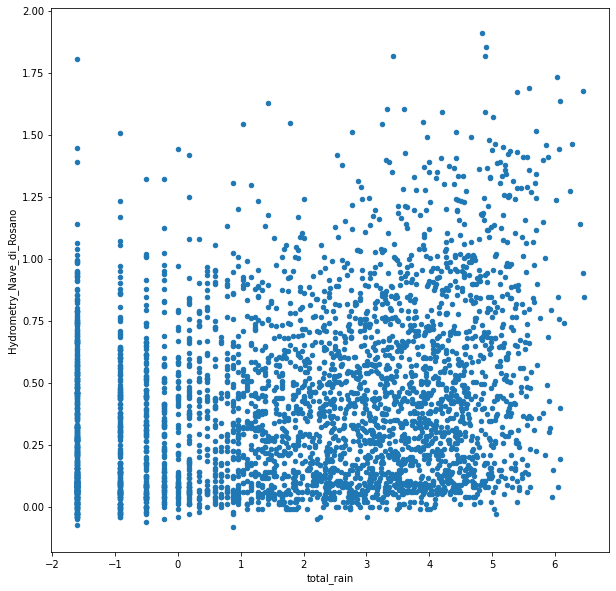

In [62]:
combined.plot(x='total_rain', y='Hydrometry_Nave_di_Rosano', kind='scatter', figsize=(10,10))

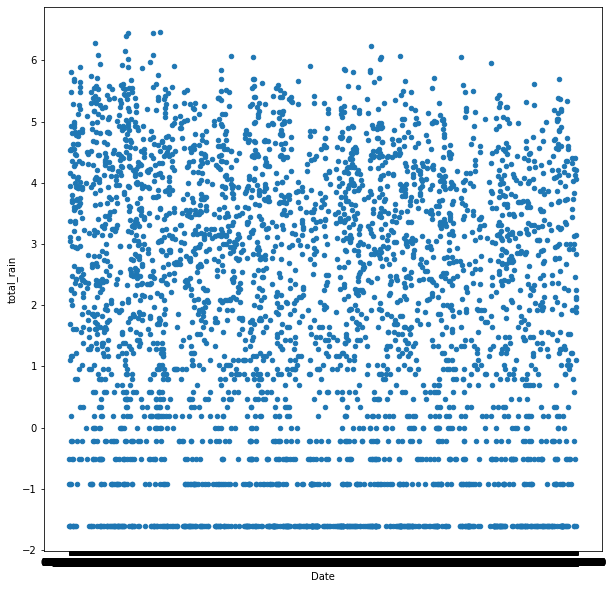

In [63]:
combined.plot(x='Date', y='total_rain', kind='scatter', figsize=(10,10))

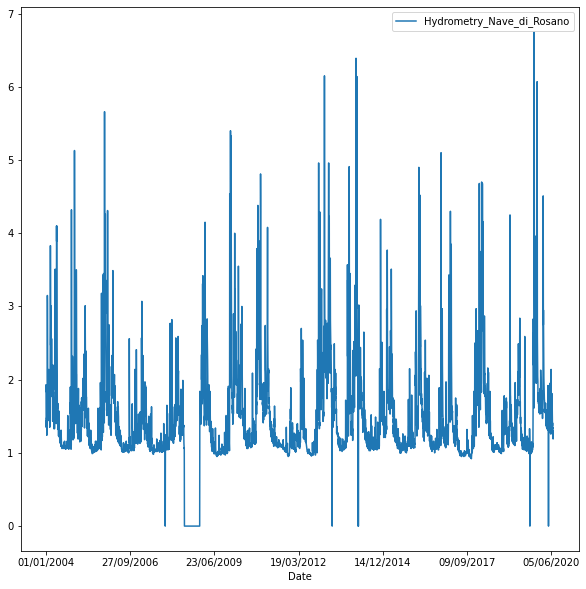

In [69]:
combined.plot(x='Date', y='Hydrometry_Nave_di_Rosano', kind='line', figsize=(10,10))